In [178]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
#from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [179]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# Load the data
train_data_EV = pd.read_csv('Train.csv')
test_data_EV = pd.read_csv('Test.csv')

# Inspect the data to understand its structure
print(train_data_EV.head())
#print(test_data_EV.head())

   Trip  VehicleSpeed_km_h_  Battery_Status
0  1567                7.76               0
1  1567                4.91               0
2  1567                3.47               0
3  1567                3.47               0
4  1567                0.00               0


Pre-Processing

In [181]:
# Normalize the feature
scaler = MinMaxScaler()
train_data_EV['VehicleSpeed_km_h_'] = scaler.fit_transform(train_data_EV[['VehicleSpeed_km_h_']])
test_data_EV['VehicleSpeed_km_h_'] = scaler.transform(test_data_EV[['VehicleSpeed_km_h_']])


Prepare the Input and Target Variables


In [182]:
# Separate features (X) and target (y)
X_train = train_data_EV[['VehicleSpeed_km_h_']].values
y_train = train_data_EV['Battery_Status'].values

X_test = test_data_EV[['VehicleSpeed_km_h_']].values
y_test = test_data_EV['Battery_Status'].values

# Reshape X to have 3D shape: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Build the RNN Model

In [183]:
# Create the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy',metrics=['accuracy'] )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train The Model

In [184]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7433 - loss: 0.5740 - val_accuracy: 0.7066 - val_loss: 0.6065
Epoch 2/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7450 - loss: 0.5667 - val_accuracy: 0.7066 - val_loss: 0.6045
Epoch 3/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7414 - loss: 0.5705 - val_accuracy: 0.7066 - val_loss: 0.6093
Epoch 4/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7415 - loss: 0.5704 - val_accuracy: 0.7066 - val_loss: 0.6103
Epoch 5/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7432 - loss: 0.5687 - val_accuracy: 0.7066 - val_loss: 0.6060
Epoch 6/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7397 - loss: 0.5719 - val_accuracy: 0.7066 - val_loss: 0.6054
Epoch 7/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7425 - loss: 0.5692 - val_accuracy: 0.7066 - val_loss: 0.6064
Epoch 8/50
2678/2678 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7423 - loss: 0.56

In [185]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

1881/1881 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7662 - loss: 0.4996
Test Accuracy: 0.7427


Predictions

In [186]:
# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary classes (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Use y_pred_classes in classification_report
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()

1881/1881 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Generate the Report

In [187]:
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     44687
           1       0.00      0.00      0.00     15485

    accuracy                           0.74     60172
   macro avg       0.37      0.50      0.43     60172
weighted avg       0.55      0.74      0.63     60172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


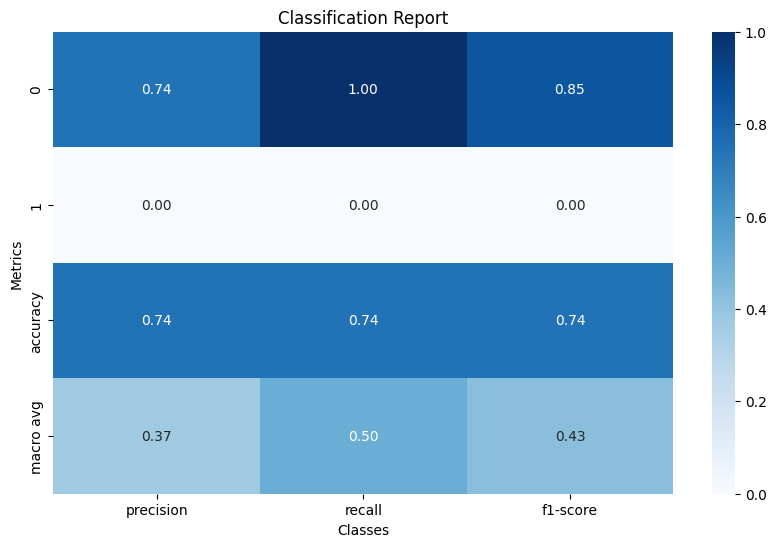

In [188]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

Calculate AUC Score: Compute the AUC using roc_auc_score.



In [189]:
y_prob = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")


1881/1881 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
AUC Score: 0.7009


Plot the ROC Curve: Generate the ROC curve and plot it.



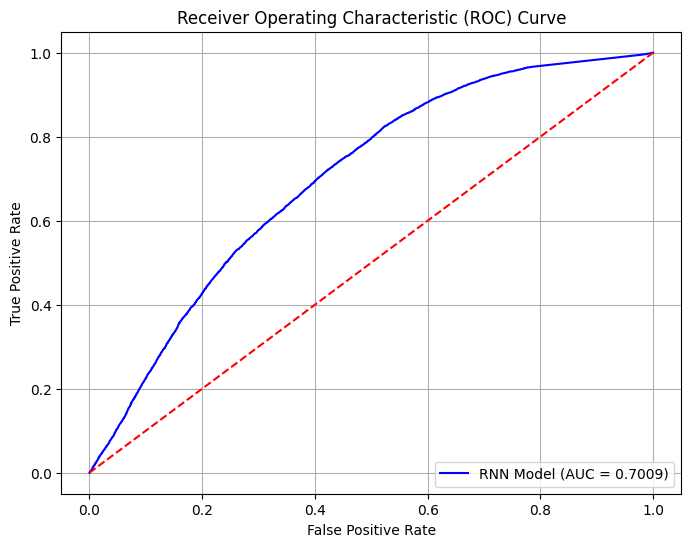

In [192]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'RNN Model (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()